## Importing Libraries and Preparing for Data Processing

In [7]:
import sys
import os
from pathlib import Path
import pandas as pd

# Add the src folder to the Python path so we can import it
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Now we can import the scripts from src/
from data_cleaning import clean_data, flatten_instagram_json, flatten_reels_json
from engagement_metrics import calculate_engagement_metrics, aggregate_engagement_by_month
from analysis import analyze_engagement_by_time, analyze_engagement_by_content_type
from visualize import plot_monthly_engagement, plot_engagement_rate
from enrichment import load_insights_posts, merge_posts_with_insights, load_reels_insights
from segmentation_analysis import analyze_content_performance_by_type, segment_by_engagement
#from content_type_analysis import categorize_image_content
from predictive_modeling import predict_engagement
from datetime import datetime, timedelta, timezone

## Setting the Root Directory and Loading Data

In [8]:
ROOT = Path(r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis")

posts_file = list(ROOT.rglob("your_instagram_activity/media/posts_1.json"))
assert posts_file, "Couldn't find posts JSON. Check your path."
posts_df = flatten_instagram_json(posts_file[0])

posts_df = clean_data(posts_df)
posts_df.head()

Loaded data type: <class 'list'>


c:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\src\data_cleaning.py:159: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["creation_month"] = df["creation_timestamp"].dt.to_period("M")


uri        creation_timestamp  \
0         media/other/18005202119701873.jpg 2024-12-30 21:00:47+07:00   
1         media/other/18067352005700577.jpg 2024-12-28 21:01:00+07:00   
2         media/other/18045234064965601.jpg 2024-12-26 20:00:44+07:00   
3  media/posts/202412/18021149483636820.jpg 2024-12-25 10:00:39+07:00   
4  media/posts/202412/18108260365453441.jpg 2024-12-25 10:00:39+07:00   

                         title    top_creation_timestamp  \
0                  Cousin Itt.                       NaT   
1  10/100 does not equal 1/10.                       NaT   
2                An old sport.                       NaT   
3                              2024-12-25 10:00:39+07:00   
4                              2024-12-25 10:00:39+07:00   

              top_title dubbing_info media_variants product_tags  \
0                                NaN            NaN          NaN   
1                                NaN            NaN          NaN   
2                                NaN            NaN          NaN   
3  Oh itâs Christmas.          NaN            NaN          NaN   
4  Oh itâs Christmas.          NaN            NaN          NaN   

   media_metadata.camera_metadata.has_camera_metadata  \
0                                              False    
1                                              False    
2                                              False    
3                                              False    
4                                              False    

  cross_post_source.source_app creation_date creation_month top_creation_date  
0                           FB    2024-12-30        2024-12               NaT  
1                           FB    2024-12-28        2024-12               NaT  
2                           FB    2024-12-26        2024-12               NaT  
3                           FB    2024-12-25        2024-12        2024-12-25  
4                           FB    2024-12-25        2024-12        2024-12-25

In [9]:
# reels_file = list(ROOT.rglob("your_instagram_activity/media/reels.json"))
# assert reels_file, "Couldn't find reels JSON. Check your path."
# reels_df = flatten_reels_json(reels_file[0])

# reels_df = clean_data(reels_df)
# reels_df.head()

# posts_df = posts_df.drop(columns=["product_tags"])

# # combined_df = pd.concat([posts_df, reels_df], ignore_index=True)

# # posts_df = combined_df.copy()

In [11]:
posts_df.head()

uri        creation_timestamp  \
0         media/other/18005202119701873.jpg 2024-12-30 21:00:47+07:00   
1         media/other/18067352005700577.jpg 2024-12-28 21:01:00+07:00   
2         media/other/18045234064965601.jpg 2024-12-26 20:00:44+07:00   
3  media/posts/202412/18021149483636820.jpg 2024-12-25 10:00:39+07:00   
4  media/posts/202412/18108260365453441.jpg 2024-12-25 10:00:39+07:00   

                         title    top_creation_timestamp  \
0                  Cousin Itt.                       NaT   
1  10/100 does not equal 1/10.                       NaT   
2                An old sport.                       NaT   
3                              2024-12-25 10:00:39+07:00   
4                              2024-12-25 10:00:39+07:00   

              top_title dubbing_info media_variants product_tags  \
0                                NaN            NaN          NaN   
1                                NaN            NaN          NaN   
2                                NaN            NaN          NaN   
3  Oh itâs Christmas.          NaN            NaN          NaN   
4  Oh itâs Christmas.          NaN            NaN          NaN   

   media_metadata.camera_metadata.has_camera_metadata  \
0                                              False    
1                                              False    
2                                              False    
3                                              False    
4                                              False    

  cross_post_source.source_app creation_date creation_month top_creation_date  
0                           FB    2024-12-30        2024-12               NaT  
1                           FB    2024-12-28        2024-12               NaT  
2                           FB    2024-12-26        2024-12               NaT  
3                           FB    2024-12-25        2024-12        2024-12-25  
4                           FB    2024-12-25        2024-12        2024-12-25

In [12]:
insights_df = load_insights_posts(ROOT)
# reels_insights_df = load_reels_insights(ROOT)
# Asia/Jakarta timezone
LOCAL_TZ = timezone(timedelta(hours=7))

if insights_df["creation_timestamp"].dtype != "datetime64[ns, UTC+07:00]":
    insights_df["creation_timestamp"] = pd.to_datetime(
        insights_df["creation_timestamp"], unit="s", utc=True
    ).dt.tz_convert(LOCAL_TZ)

insights_df.head()
# reels_insights_df.head()    


uri        creation_timestamp  \
0  media/other/18005202119701873.jpg 2024-12-30 21:00:47+07:00   
1  media/other/18067352005700577.jpg 2024-12-28 21:01:00+07:00   
2  media/other/18045234064965601.jpg 2024-12-26 20:00:44+07:00   
3  media/other/17850460545325482.jpg 2024-12-24 22:00:52+07:00   
4  media/other/18365546479137722.jpg 2024-12-23 22:00:56+07:00   

                         title  likes  comments  reach  impressions  saves  \
0                  Cousin Itt.     42         0    926         1047      5   
1  10/100 does not equal 1/10.     37         0   1016         1108      2   
2                An old sport.     26         0    639          698      2   
3        Controlling the view.     57         0   1154         1266      2   
4                   What a do.     47         1    737          805      2   

   shares  profile_visits  follows  
0       2               4        0  
1       1               7        1  
2       0               5        0  
3       0              16        0  
4       1               7        0

In [13]:
insights_df.shape

(205, 11)

### Merging with insights

In [14]:
# merge
posts_enriched = posts_df.merge(
    insights_df,
    how="left",
    on=["uri","creation_timestamp","title"],  # best-case match
)
# Fallback: fill NaNs
for c in ["likes","comments","reach","impressions","saves","shares"]:
    if c not in posts_enriched.columns:
        posts_enriched[c] = 0
    posts_enriched[c] = pd.to_numeric(posts_enriched[c], errors="coerce").fillna(0)

# metrics
posts_enriched = calculate_engagement_metrics(posts_enriched)
posts_enriched.head()
#posts_enriched.to_csv(r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed\posts_enriched.csv", index=False)

uri        creation_timestamp  \
0         media/other/18005202119701873.jpg 2024-12-30 21:00:47+07:00   
1         media/other/18067352005700577.jpg 2024-12-28 21:01:00+07:00   
2         media/other/18045234064965601.jpg 2024-12-26 20:00:44+07:00   
3  media/posts/202412/18021149483636820.jpg 2024-12-25 10:00:39+07:00   
4  media/posts/202412/18108260365453441.jpg 2024-12-25 10:00:39+07:00   

                         title    top_creation_timestamp  \
0                  Cousin Itt.                       NaT   
1  10/100 does not equal 1/10.                       NaT   
2                An old sport.                       NaT   
3                              2024-12-25 10:00:39+07:00   
4                              2024-12-25 10:00:39+07:00   

              top_title dubbing_info media_variants product_tags  \
0                                NaN            NaN          NaN   
1                                NaN            NaN          NaN   
2                                NaN            NaN          NaN   
3  Oh itâs Christmas.          NaN            NaN          NaN   
4  Oh itâs Christmas.          NaN            NaN          NaN   

   media_metadata.camera_metadata.has_camera_metadata  \
0                                              False    
1                                              False    
2                                              False    
3                                              False    
4                                              False    

  cross_post_source.source_app  ... comments   reach impressions  saves  \
0                           FB  ...      0.0   926.0      1047.0    5.0   
1                           FB  ...      0.0  1016.0      1108.0    2.0   
2                           FB  ...      0.0   639.0       698.0    2.0   
3                           FB  ...      0.0     0.0         0.0    0.0   
4                           FB  ...      0.0     0.0         0.0    0.0   

   shares  profile_visits  follows  followers_count  engagement  \
0     2.0             4.0      0.0             1000        42.0   
1     1.0             7.0      1.0             1000        37.0   
2     0.0             5.0      0.0             1000        26.0   
3     0.0             NaN      NaN             1000         0.0   
4     0.0             NaN      NaN             1000         0.0   

   engagement_rate  
0            0.042  
1            0.037  
2            0.026  
3            0.000  
4            0.000  

[5 rows x 24 columns]

In [15]:
posts_enriched.shape

(319, 24)

# Analysis starts from here

## Aggregating Engagement by Month

C:\Users\stefa\AppData\Local\Temp\ipykernel_19780\2337982443.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly["month"] = monthly["creation_timestamp"].dt.to_period("M")


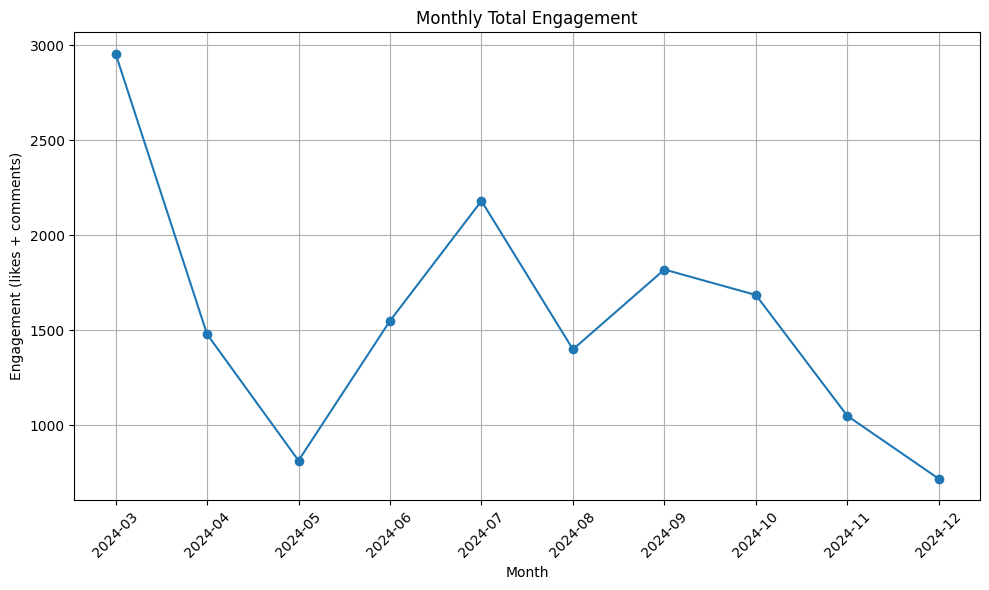

In [44]:
import matplotlib.pyplot as plt

monthly = posts_enriched.copy()
monthly["month"] = monthly["creation_timestamp"].dt.to_period("M")
monthly = (
    monthly.groupby("month")[["likes", "comments", "reach", "impressions", "engagement"]]
    .sum()
    .reset_index()
)
monthly["month"] = monthly["month"].astype(str)

plt.figure(figsize=(10, 6))
plt.plot(monthly["month"], monthly["engagement"], marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Total Engagement")
plt.xlabel("Month")
plt.ylabel("Engagement (likes + comments)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Engagement by Time of Day / Day of Week

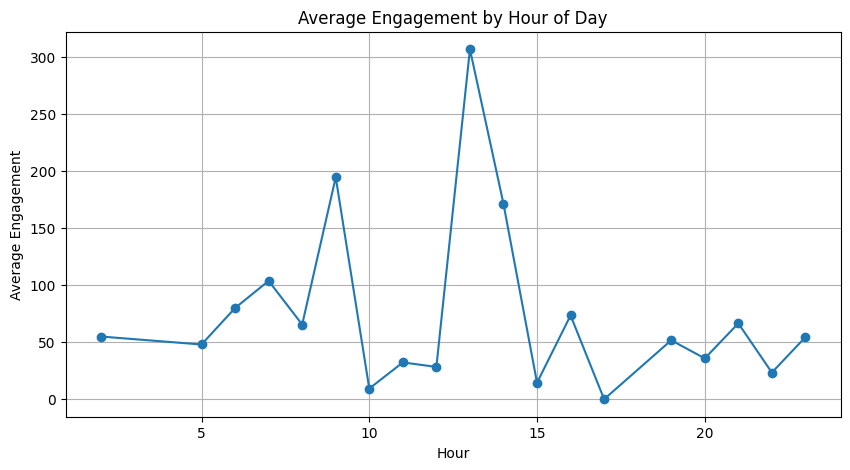

In [45]:
# Extract hour and weekday
posts_enriched["hour"] = posts_enriched["creation_timestamp"].dt.hour
posts_enriched["weekday"] = posts_enriched["creation_timestamp"].dt.day_name()

# Average engagement per hour
hourly = posts_enriched.groupby("hour")["engagement"].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(hourly["hour"], hourly["engagement"], marker="o")
plt.title("Average Engagement by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Engagement")
plt.grid(True)
plt.show()


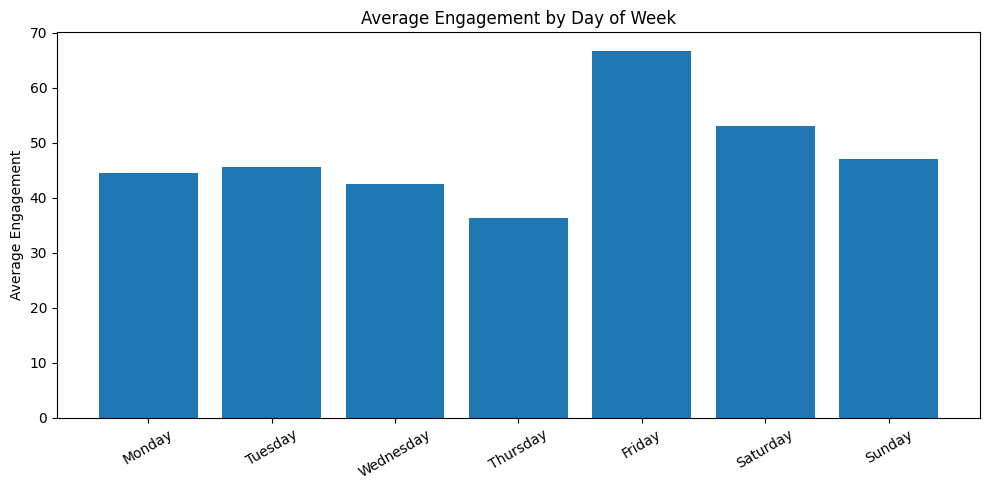

In [46]:
# Average engagement per weekday
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday = (
    posts_enriched.groupby("weekday")["engagement"]
    .mean()
    .reindex(weekday_order)
    .reset_index()
)

plt.figure(figsize=(10, 5))
plt.bar(weekday["weekday"], weekday["engagement"])
plt.title("Average Engagement by Day of Week")
plt.xticks(rotation=30)
plt.ylabel("Average Engagement")
plt.tight_layout()
plt.show()

## Engagement Efficiency
### Which posts were punching above their weight ex:maybe a reel that reached fewer people but got a huge like rate.

In [47]:
posts_enriched["like_rate"] = (posts_enriched["likes"] / posts_enriched["reach"]).replace([float("inf"), -float("inf")], 0)
posts_enriched["comment_rate"] = (posts_enriched["comments"] / posts_enriched["reach"]).replace([float("inf"), -float("inf")], 0)
posts_enriched["save_rate"] = (posts_enriched["saves"] / posts_enriched["reach"]).replace([float("inf"), -float("inf")], 0)

efficiency = posts_enriched[["uri","title", "reach", "likes", "comments", "saves", "like_rate", "comment_rate", "save_rate"]]
efficiency.sort_values(by="like_rate", ascending=False).head(10)


uri  \
87   media/other/18357843769187639.jpg   
205  media/other/18031969951851726.jpg   
123  media/other/18106327948420268.jpg   
107  media/other/17889103545095709.jpg   
183  media/other/18040563178900075.jpg   
103  media/other/17856666741266562.jpg   
79   media/other/17928717605848607.jpg   
135  media/other/18055332136778544.jpg   
288  media/other/17897838125976076.jpg   
96   media/other/18042295397293158.jpg   

                                        title   reach  likes  comments  saves  \
87                                  Namesake.  1410.0  167.0       9.0    1.0   
205                      Motion in stillness.  2648.0  312.0       6.0   35.0   
123                       Playing dress down.  1815.0  202.0       7.0    5.0   
107                       Devotional rapture.  2921.0  302.0       5.0   29.0   
183                    ____, can I post this?  2670.0  274.0       7.0   24.0   
103         Carina, Carina â¦ â¦. â¦. â¦.  1588.0  157.0       7.0    6.0   
79   Everything we do is in the name of love.  2570.0  254.0      18.0    6.0   
135                             Cannon balls.  2038.0  200.0       7.0   11.0   
288                 Venus surrounded by eggs.   840.0   81.0       1.0    2.0   
96                        Teasing perception.   990.0   93.0       2.0    6.0   

     like_rate  comment_rate  save_rate  
87    0.118440      0.006383   0.000709  
205   0.117825      0.002266   0.013218  
123   0.111295      0.003857   0.002755  
107   0.103389      0.001712   0.009928  
183   0.102622      0.002622   0.008989  
103   0.098866      0.004408   0.003778  
79    0.098833      0.007004   0.002335  
135   0.098135      0.003435   0.005397  
288   0.096429      0.001190   0.002381  
96    0.093939      0.002020   0.006061

### High-Performing Content

In [48]:
top_posts = posts_enriched.sort_values(by="engagement_rate", ascending=False).head(10)
top_posts[["uri","title", "likes", "comments", "reach", "impressions", "engagement_rate"]].head()

uri                             title  \
181  media/other/17936217308853227.jpg            Topography of a tango.   
318  media/other/17948526479776599.jpg       Bite test. Tastes recycled.   
213  media/other/18048633694666140.jpg  99 out of a 100 donât make it.   
182  media/other/18450965923058024.jpg                   The Chosen One.   
205  media/other/18031969951851726.jpg              Motion in stillness.   

     likes  comments    reach  impressions  engagement_rate  
181  464.0       4.0  22855.0      32764.0            0.468  
318  426.0      18.0  27530.0      48572.0            0.444  
213  381.0      22.0  25455.0      42099.0            0.403  
182  312.0      11.0  16793.0      31709.0            0.323  
205  312.0       6.0   2648.0       3024.0            0.318

### Performance Category

In [52]:
def label_performance(rate):
    if rate >= posts_enriched["engagement_rate"].quantile(0.75):
        return "Quantile 0.75"
    elif rate >= posts_enriched["engagement_rate"].quantile(0.25):
        return "Quantile 0.25"
    else:
        return "Low"

posts_enriched["performance_label"] = posts_enriched["engagement_rate"].apply(label_performance)
posts_enriched["performance_label"].value_counts()
posts_enriched.head()


uri        creation_timestamp  \
0         media/other/18005202119701873.jpg 2024-12-30 21:00:47+07:00   
1         media/other/18067352005700577.jpg 2024-12-28 21:01:00+07:00   
2         media/other/18045234064965601.jpg 2024-12-26 20:00:44+07:00   
3  media/posts/202412/18021149483636820.jpg 2024-12-25 10:00:39+07:00   
4  media/posts/202412/18108260365453441.jpg 2024-12-25 10:00:39+07:00   

                         title    top_creation_timestamp  \
0                  Cousin Itt.                       NaT   
1  10/100 does not equal 1/10.                       NaT   
2                An old sport.                       NaT   
3                              2024-12-25 10:00:39+07:00   
4                              2024-12-25 10:00:39+07:00   

              top_title dubbing_info media_variants product_tags  \
0                                NaN            NaN          NaN   
1                                NaN            NaN          NaN   
2                                NaN            NaN          NaN   
3  Oh itâs Christmas.          NaN            NaN          NaN   
4  Oh itâs Christmas.          NaN            NaN          NaN   

   media_metadata.camera_metadata.has_camera_metadata  \
0                                              False    
1                                              False    
2                                              False    
3                                              False    
4                                              False    

  cross_post_source.source_app  ... follows followers_count engagement  \
0                           FB  ...     0.0            1000       42.0   
1                           FB  ...     1.0            1000       37.0   
2                           FB  ...     0.0            1000       26.0   
3                           FB  ...     NaN            1000        0.0   
4                           FB  ...     NaN            1000        0.0   

   engagement_rate  hour    weekday  like_rate  comment_rate  save_rate  \
0            0.042    21     Monday   0.045356           0.0   0.005400   
1            0.037    21   Saturday   0.036417           0.0   0.001969   
2            0.026    20   Thursday   0.040689           0.0   0.003130   
3            0.000    10  Wednesday        NaN           NaN        NaN   
4            0.000    10  Wednesday        NaN           NaN        NaN   

   performance_label  
0      Quantile 0.25  
1      Quantile 0.25  
2      Quantile 0.25  
3      Quantile 0.25  
4      Quantile 0.25  

[5 rows x 30 columns]

In [53]:
posts_enriched.shape

(319, 30)

### Seeing the distribution of the post, but taking 0 and NaN value into considerations

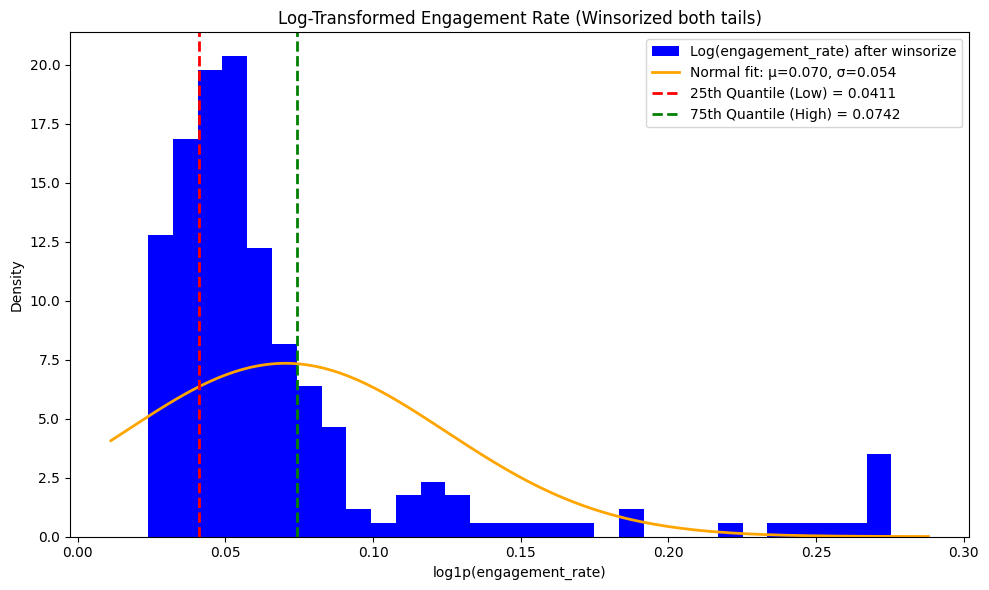

(205, 32)

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# 0) Start from a copy so you don't keep mutating the master
posts_model = posts_enriched.copy()

# 1) Recompute engagement_rate cleanly (avoid forced zeros)
posts_model["engagement_rate"] = posts_model["engagement"] / posts_model["followers_count"]

# Turn invalid into NaN, not 0
mask_bad = ~np.isfinite(posts_model["engagement_rate"])
posts_model.loc[mask_bad, "engagement_rate"] = np.nan

# 2) Filter out rows that cannot be meaningful for rate analysis
posts_model = posts_model[(posts_model["followers_count"] > 0) & (posts_model["reach"] > 0)]

# Also drop NaN engagement_rate
posts_model = posts_model.dropna(subset=["engagement_rate"])

# Optional: drop truly trivial rates (e.g., below 0.0001) that come from tiny engagement on large follower counts
# posts_model = posts_model[posts_model["engagement_rate"] >= 1e-4]

# 3) Winsorize BOTH tails before log
q_lo, q_hi = posts_model["engagement_rate"].quantile([0.02, 0.98])
posts_model["engagement_rate_w"] = posts_model["engagement_rate"].clip(lower=q_lo, upper=q_hi)

# 4) Log-transform after winsorization
posts_model["log_engagement_rate"] = np.log1p(posts_model["engagement_rate_w"])

# 5) Plot distribution + normal fit
plt.figure(figsize=(10, 6))
vals = posts_model["log_engagement_rate"].dropna()
plt.hist(vals, bins=30, density=True, label="Log(engagement_rate) after winsorize", color='blue')

# Fit a normal distribution to the log-transformed data
mu, std = norm.fit(vals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
plt.plot(x, norm.pdf(x, mu, std), linewidth=2, label=f"Normal fit: μ={mu:.3f}, σ={std:.3f}", color="orange")

# Calculate quantiles for the transformed data (log_engagement_rate)
q_lo_log, q_hi_log = posts_model["log_engagement_rate"].quantile([0.25, 0.75])  # Quantiles for log-transformed data

# Mark the quantiles on the plot for log-transformed data
plt.axvline(q_lo_log, color='red', linestyle='dashed', linewidth=2, label=f"25th Quantile (Low) = {q_lo_log:.4f}")
plt.axvline(q_hi_log, color='green', linestyle='dashed', linewidth=2, label=f"75th Quantile (High) = {q_hi_log:.4f}")

plt.title("Log-Transformed Engagement Rate (Winsorized both tails)")
plt.xlabel("log1p(engagement_rate)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

posts_model.shape


In [102]:
def label_performance_log(rate):
    if pd.isna(rate):  
        return "Unknown"  
    if rate >= posts_model['log_engagement_rate'].quantile(0.75):
        return "High"
    elif rate >= posts_model['log_engagement_rate'].quantile(0.25):
        return "Medium"
    else:
        return "Low"


In [103]:
posts_model["performance_label_log"] = posts_model["log_engagement_rate"].apply(label_performance_log)

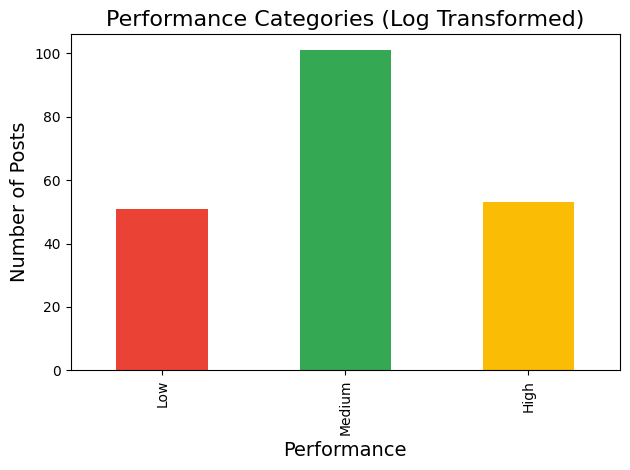

In [105]:
# Reorder the performance labels to Low, Medium, High
posts_model["performance_label_log"] = posts_model["performance_label_log"].astype(pd.CategoricalDtype(categories=["Low", "Medium", "High"], ordered=True))

# Plot the performance categories with the desired order (Low, Medium, High)
posts_model["performance_label_log"].value_counts().sort_index().plot(kind="bar", color=['#ea4335', '#34a853', '#fbbc05'])
plt.title("Performance Categories (Log Transformed)", fontsize=16)
plt.ylabel('Number of Posts', fontsize=14)
plt.xlabel('Performance', fontsize=14)
plt.tight_layout()
plt.show()



## Audience Behavious Analysis

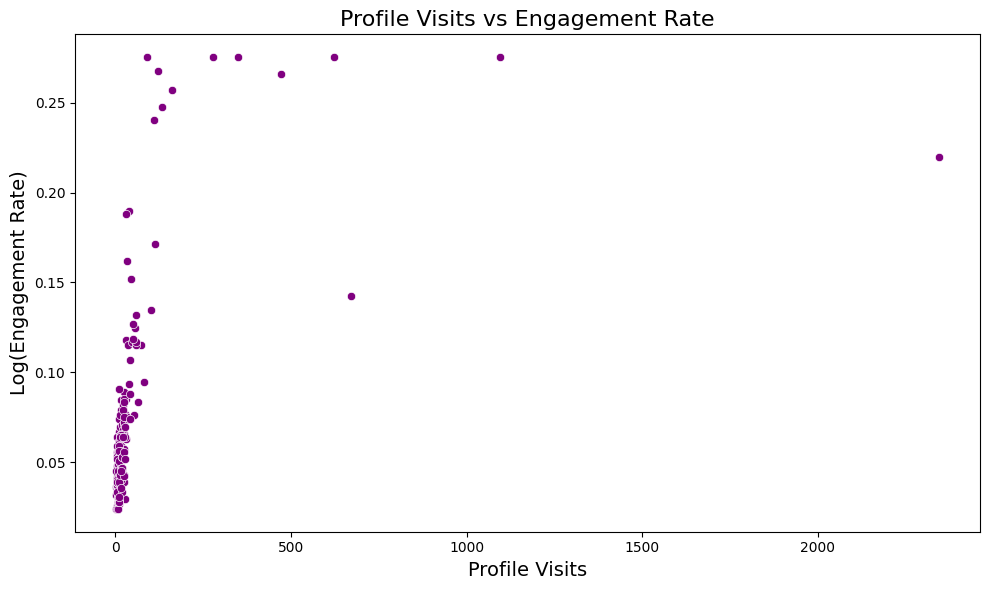

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=posts_model["profile_visits"], y=posts_model["log_engagement_rate"], color="purple")
plt.title("Profile Visits vs Engagement Rate", fontsize=16)
plt.xlabel("Profile Visits", fontsize=14)
plt.ylabel("Log(Engagement Rate)", fontsize=14)
plt.tight_layout()
plt.show()


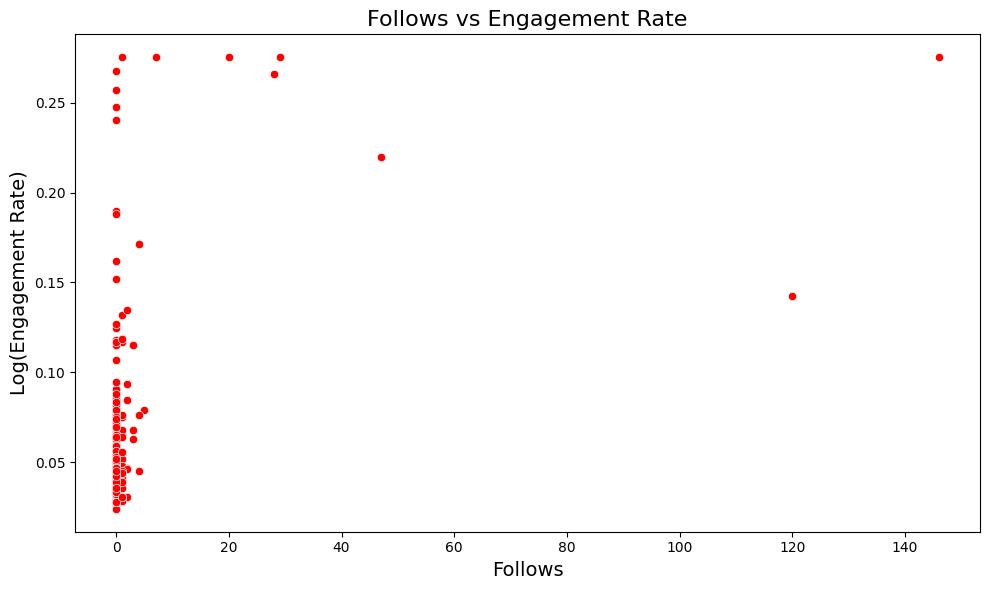

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=posts_model["follows"], y=posts_model["log_engagement_rate"], color="red")
plt.title("Follows vs Engagement Rate", fontsize=16)
plt.xlabel("Follows", fontsize=14)
plt.ylabel("Log(Engagement Rate)", fontsize=14)
plt.tight_layout()
plt.show()


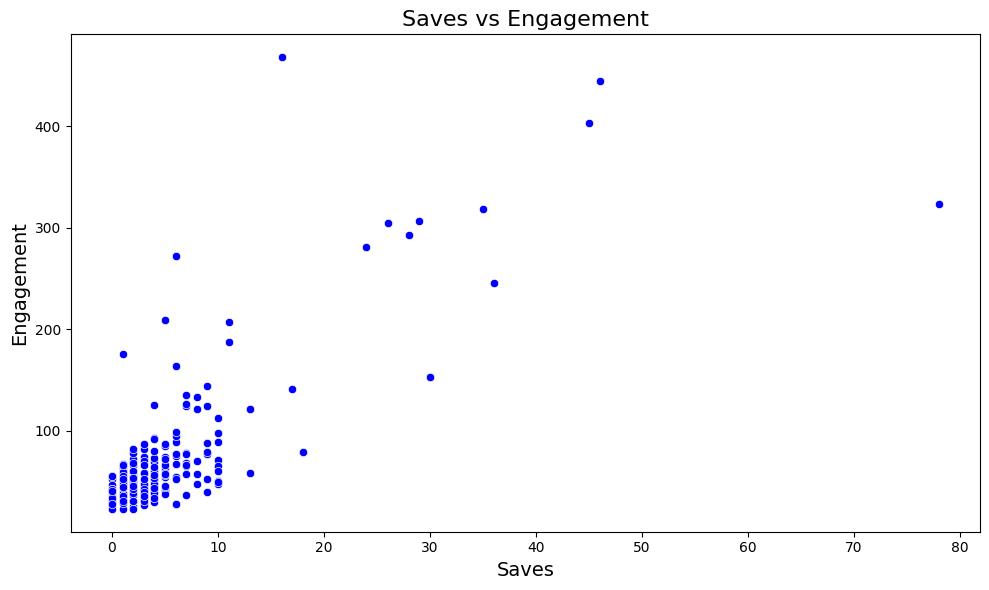

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=posts_model["saves"], y=posts_model["engagement"], color="blue")
plt.title("Saves vs Engagement", fontsize=16)
plt.xlabel("Saves", fontsize=14)
plt.ylabel("Engagement", fontsize=14)
plt.tight_layout()
plt.show()

In [80]:
high_performance_posts = posts_model[posts_model["performance_label_log"] == "High"]

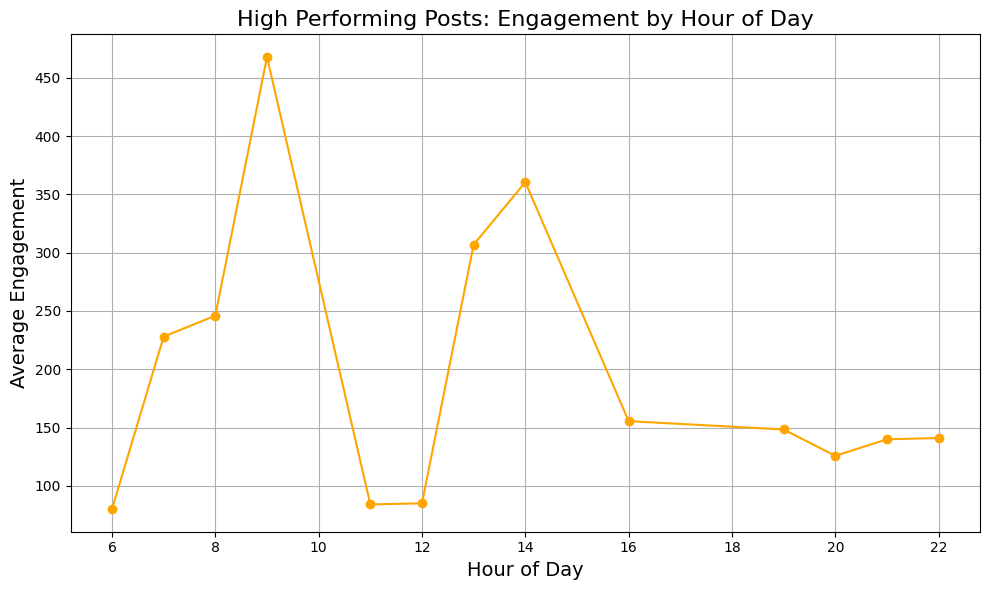

In [85]:
hourly_high = high_performance_posts.groupby("hour")["engagement"].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(hourly_high["hour"], hourly_high["engagement"], marker="o", color="orange")
plt.title("High Performing Posts: Engagement by Hour of Day", fontsize=16)
plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("Average Engagement", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

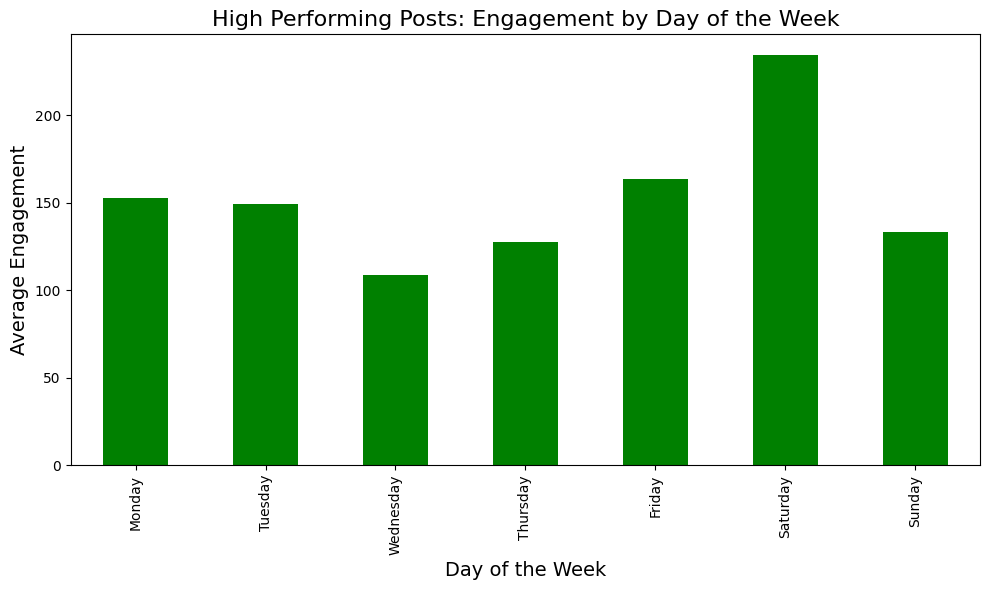

In [84]:
weekday_high = high_performance_posts.groupby("weekday")["engagement"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

plt.figure(figsize=(10, 6))
weekday_high.plot(kind="bar", color="green")
plt.title("High Performing Posts: Engagement by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Average Engagement", fontsize=14)
plt.tight_layout()
plt.show()

In [87]:
high_performance_posts

uri        creation_timestamp  \
45   media/other/18069261775628727.jpg 2024-11-22 21:00:57+07:00   
71   media/other/17947111085860729.jpg 2024-11-03 21:00:43+07:00   
79   media/other/17928717605848607.jpg 2024-10-25 21:00:52+07:00   
87   media/other/18357843769187639.jpg 2024-10-15 21:00:49+07:00   
89   media/other/18439507759069649.jpg 2024-10-13 21:00:41+07:00   
91   media/other/18046652818977170.jpg 2024-10-11 21:00:57+07:00   
96   media/other/18042295397293158.jpg 2024-10-06 21:00:56+07:00   
103  media/other/17856666741266562.jpg 2024-09-28 21:00:39+07:00   
104  media/other/18022755476417665.jpg 2024-09-27 21:00:46+07:00   
107  media/other/17889103545095709.jpg 2024-09-24 13:54:59+07:00   
113  media/other/18326422351145349.jpg 2024-09-16 21:01:19+07:00   
123  media/other/18106327948420268.jpg 2024-09-07 21:00:48+07:00   
132  media/other/18075787819477816.jpg 2024-08-23 21:00:50+07:00   
135  media/other/18055332136778544.jpg 2024-08-21 21:00:49+07:00   
140  media/other/18195823267293456.jpg 2024-08-16 21:00:56+07:00   
152  media/other/18065167399597365.jpg 2024-08-07 19:30:49+07:00   
157  media/other/18019324949158419.jpg 2024-08-01 19:30:35+07:00   
179  media/other/18008398001611283.jpg 2024-07-10 07:30:29+07:00   
180  media/other/18013553804224632.jpg 2024-07-09 19:30:42+07:00   
181  media/other/17936217308853227.jpg 2024-07-06 09:00:52+07:00   
182  media/other/18450965923058024.jpg 2024-07-05 07:30:33+07:00   
183  media/other/18040563178900075.jpg 2024-07-04 19:30:30+07:00   
184  media/other/17884489788065286.jpg 2024-07-03 11:01:01+07:00   
188  media/other/18105765676403756.jpg 2024-06-29 12:00:42+07:00   
189  media/other/18091839637452286.jpg 2024-06-28 06:00:46+07:00   
191  media/other/18025525922324723.jpg 2024-06-25 11:00:50+07:00   
192  media/other/17849817147232991.jpg 2024-06-24 08:00:56+07:00   
205  media/other/18031969951851726.jpg 2024-06-01 14:00:53+07:00   
213  media/other/18048633694666140.jpg 2024-05-25 14:00:43+07:00   
271  media/other/18116181991327646.jpg 2024-05-01 20:00:51+07:00   
275  media/other/18038413597847490.jpg 2024-04-20 20:00:55+07:00   
276  media/other/18087852622440491.jpg 2024-04-18 20:00:58+07:00   
278  media/other/17997627800544484.jpg 2024-04-14 22:00:51+07:00   
280  media/other/17854642941157571.jpg 2024-04-10 20:01:30+07:00   
285  media/other/18425747479003208.jpg 2024-04-05 20:02:30+07:00   
288  media/other/17897838125976076.jpg 2024-04-03 20:02:30+07:00   
293  media/other/18101421166386156.jpg 2024-04-01 20:00:59+07:00   
295  media/other/18023821175041365.jpg 2024-03-31 21:01:28+07:00   
296  media/other/17983964519649672.jpg 2024-03-31 21:01:00+07:00   
297  media/other/18000107516596228.jpg 2024-03-30 20:02:30+07:00   
301  media/other/17864408286098662.jpg 2024-03-26 19:01:31+07:00   
304  media/other/18019331471124643.jpg 2024-03-22 20:01:30+07:00   
305  media/other/17858006157115512.jpg 2024-03-22 20:01:09+07:00   
306  media/other/18036696931684670.jpg 2024-03-21 19:01:29+07:00   
307  media/other/18337977934128255.jpg 2024-03-21 19:01:22+07:00   
308  media/other/17973756833678898.jpg 2024-03-20 19:01:07+07:00   
309  media/other/17933470850818289.jpg 2024-03-18 16:09:23+07:00   
311  media/other/18425719153045778.jpg 2024-03-18 16:05:45+07:00   
312  media/other/17904902930946304.jpg 2024-03-08 20:04:23+07:00   
313  media/other/18079893457443261.jpg 2024-03-08 20:03:52+07:00   
314  media/other/18046705567622074.jpg 2024-03-08 20:02:36+07:00   
315  media/other/18070344352483188.jpg 2024-03-08 20:02:09+07:00   
318  media/other/17948526479776599.jpg 2024-03-08 19:58:59+07:00   

                                        title top_creation_timestamp  \
45                        Caterpillar shadow.                    NaT   
71                                  The Kiss.                    NaT   
79   Everything we do is in the name of love.                    NaT   
87                                  Namesake.                    NaT   
89

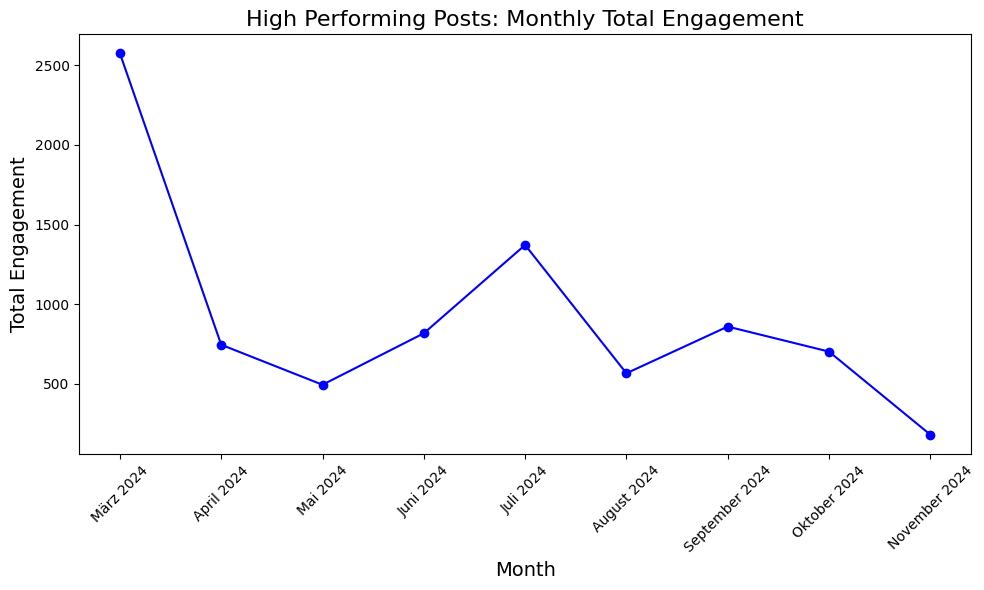

In [91]:
monthly_high = high_performance_posts.groupby("creation_month")["engagement"].sum().reset_index()

monthly_high = monthly_high.sort_values(by="creation_month")

# Plot total engagement by month for high-performing posts
plt.figure(figsize=(10, 6))
plt.plot(monthly_high["creation_month"].dt.strftime('%B %Y'), monthly_high["engagement"], marker="o", color="blue")
plt.title("High Performing Posts: Monthly Total Engagement", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Engagement", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the insights from the charts and graphs you've shared, here are some key points to note:

### 1. **Performance Categories (Log Transformed)**

* **Medium posts dominate**: The majority of posts fall into the "Medium" performance category, followed by "High" and "Low". This suggests that most posts have average engagement, with only a few posts achieving very high or very low engagement.
* **Distribution balance**: The distribution across the three categories indicates that the content generally performs in the middle range. This could mean that most posts engage with a moderate number of followers, and improvements might be needed to elevate engagement rates across the board.

### 2. **Profile Visits vs Engagement Rate**

* **Moderate correlation**: There appears to be a slight correlation between profile visits and engagement rate, with higher engagement rates generally associated with more profile visits. However, there are also a few extreme outliers (higher profile visits but low engagement), suggesting that visits don't always translate into high engagement.
* **Outliers**: The graph shows that a few posts with a high number of profile visits seem to have very high engagement rates, indicating that profile visits alone may not be the only factor that drives engagement.

### 3. **Follows vs Engagement Rate**

* **Similar trend to Profile Visits**: The relationship between follows and engagement rate follows a similar trend to profile visits, with a small number of posts that show a sharp increase in engagement with more follows.
* **Positive correlation with outliers**: Like profile visits, the more follows, the higher the likelihood of engagement, but some posts defy this trend, indicating that more follows don’t necessarily guarantee better engagement.

### 4. **Saves vs Engagement**

* **Strong positive relationship**: The chart clearly shows that posts with more saves tend to have higher engagement. This indicates that saves are a strong indicator of engagement, implying that users find the content valuable enough to save for future reference.
* **Cluster at the lower end**: Most posts fall within the lower end of the save scale, with a small number of posts receiving a lot of saves and higher engagement, emphasizing that saving a post may be a good sign of the content's relevance.

### 5. **Engagement by Hour of Day**

* **Peak in the morning**: The highest engagement occurs between 8 AM and 10 AM, with a significant drop as the day progresses, and a steady decrease throughout the afternoon. This suggests that posts published early in the day tend to receive higher engagement.
* **Strategy opportunity**: If you're planning to schedule posts, focusing on the morning hours might help increase visibility and interaction.

### 6. **Engagement by Day of Week**

* **Saturday stands out**: Saturday shows the highest average engagement, suggesting that posts made on weekends, particularly on Saturdays, tend to perform better. This might be related to users having more free time and being more active on social media.
* **Consistent engagement throughout the week**: While Saturday stands out, other days also see reasonably high engagement, with Monday and Friday also showing strong engagement.

### 7. **Monthly Total Engagement**

* **March 2024 peak**: March saw an unusually high engagement, followed by a dip and a gradual recovery, with smaller peaks in the later months.
* **Seasonal trend**: The engagement pattern suggests a seasonal cycle, where engagement may have been higher in early spring (March/April) and then tapered off before rising again in July.
* **Post timing strategy**: You may consider focusing on promoting content during months like March and July when engagement spikes.

### General Insights:

* Most posts tend to fall into the medium engagement range, with a smaller group excelling with high engagement rates.
* Profile visits, follows, and saves are all correlated with higher engagement, although the relationship is not perfect, and a few outliers exist.
* Timing is a key factor in engagement, with mornings and weekends showing the best results.

### Recommendations:

* Consider focusing on posting during peak engagement hours (morning) and days (Saturday).
* Explore ways to improve content that drives higher profile visits and follows to increase engagement.
* Focus on optimizing saves as they are a good indicator of content success.


In [117]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

high_performance_posts = posts_model[posts_model["performance_label_log"] == "High"]

high_performance_uris = high_performance_posts["uri"].tolist()

In [118]:
high_performance_posts

uri        creation_timestamp  \
45   media/other/18069261775628727.jpg 2024-11-22 21:00:57+07:00   
71   media/other/17947111085860729.jpg 2024-11-03 21:00:43+07:00   
79   media/other/17928717605848607.jpg 2024-10-25 21:00:52+07:00   
87   media/other/18357843769187639.jpg 2024-10-15 21:00:49+07:00   
89   media/other/18439507759069649.jpg 2024-10-13 21:00:41+07:00   
91   media/other/18046652818977170.jpg 2024-10-11 21:00:57+07:00   
96   media/other/18042295397293158.jpg 2024-10-06 21:00:56+07:00   
103  media/other/17856666741266562.jpg 2024-09-28 21:00:39+07:00   
104  media/other/18022755476417665.jpg 2024-09-27 21:00:46+07:00   
107  media/other/17889103545095709.jpg 2024-09-24 13:54:59+07:00   
113  media/other/18326422351145349.jpg 2024-09-16 21:01:19+07:00   
123  media/other/18106327948420268.jpg 2024-09-07 21:00:48+07:00   
132  media/other/18075787819477816.jpg 2024-08-23 21:00:50+07:00   
135  media/other/18055332136778544.jpg 2024-08-21 21:00:49+07:00   
140  media/other/18195823267293456.jpg 2024-08-16 21:00:56+07:00   
152  media/other/18065167399597365.jpg 2024-08-07 19:30:49+07:00   
157  media/other/18019324949158419.jpg 2024-08-01 19:30:35+07:00   
179  media/other/18008398001611283.jpg 2024-07-10 07:30:29+07:00   
180  media/other/18013553804224632.jpg 2024-07-09 19:30:42+07:00   
181  media/other/17936217308853227.jpg 2024-07-06 09:00:52+07:00   
182  media/other/18450965923058024.jpg 2024-07-05 07:30:33+07:00   
183  media/other/18040563178900075.jpg 2024-07-04 19:30:30+07:00   
184  media/other/17884489788065286.jpg 2024-07-03 11:01:01+07:00   
188  media/other/18105765676403756.jpg 2024-06-29 12:00:42+07:00   
189  media/other/18091839637452286.jpg 2024-06-28 06:00:46+07:00   
191  media/other/18025525922324723.jpg 2024-06-25 11:00:50+07:00   
192  media/other/17849817147232991.jpg 2024-06-24 08:00:56+07:00   
205  media/other/18031969951851726.jpg 2024-06-01 14:00:53+07:00   
213  media/other/18048633694666140.jpg 2024-05-25 14:00:43+07:00   
271  media/other/18116181991327646.jpg 2024-05-01 20:00:51+07:00   
275  media/other/18038413597847490.jpg 2024-04-20 20:00:55+07:00   
276  media/other/18087852622440491.jpg 2024-04-18 20:00:58+07:00   
278  media/other/17997627800544484.jpg 2024-04-14 22:00:51+07:00   
280  media/other/17854642941157571.jpg 2024-04-10 20:01:30+07:00   
285  media/other/18425747479003208.jpg 2024-04-05 20:02:30+07:00   
288  media/other/17897838125976076.jpg 2024-04-03 20:02:30+07:00   
293  media/other/18101421166386156.jpg 2024-04-01 20:00:59+07:00   
295  media/other/18023821175041365.jpg 2024-03-31 21:01:28+07:00   
296  media/other/17983964519649672.jpg 2024-03-31 21:01:00+07:00   
297  media/other/18000107516596228.jpg 2024-03-30 20:02:30+07:00   
301  media/other/17864408286098662.jpg 2024-03-26 19:01:31+07:00   
304  media/other/18019331471124643.jpg 2024-03-22 20:01:30+07:00   
305  media/other/17858006157115512.jpg 2024-03-22 20:01:09+07:00   
306  media/other/18036696931684670.jpg 2024-03-21 19:01:29+07:00   
307  media/other/18337977934128255.jpg 2024-03-21 19:01:22+07:00   
308  media/other/17973756833678898.jpg 2024-03-20 19:01:07+07:00   
309  media/other/17933470850818289.jpg 2024-03-18 16:09:23+07:00   
311  media/other/18425719153045778.jpg 2024-03-18 16:05:45+07:00   
312  media/other/17904902930946304.jpg 2024-03-08 20:04:23+07:00   
313  media/other/18079893457443261.jpg 2024-03-08 20:03:52+07:00   
314  media/other/18046705567622074.jpg 2024-03-08 20:02:36+07:00   
315  media/other/18070344352483188.jpg 2024-03-08 20:02:09+07:00   
318  media/other/17948526479776599.jpg 2024-03-08 19:58:59+07:00   

                                        title top_creation_timestamp  \
45                        Caterpillar shadow.                    NaT   
71                                  The Kiss.                    NaT   
79   Everything we do is in the name of love.                    NaT   
87                                  Namesake.                    NaT   
89

Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/18069261775628727.jpg


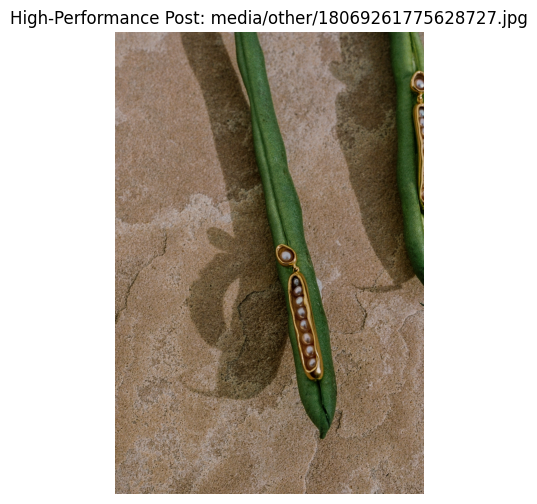

Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/17947111085860729.jpg


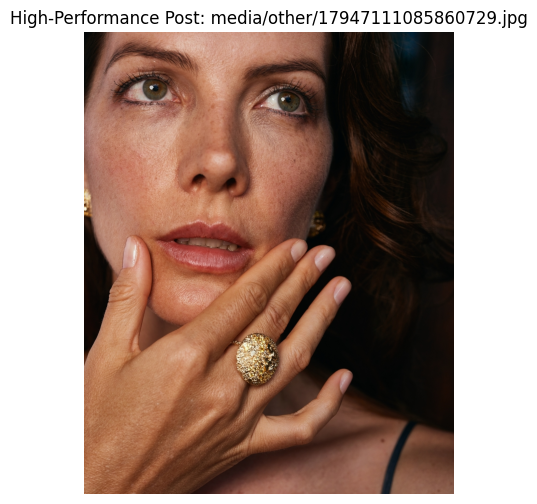

Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/17928717605848607.jpg


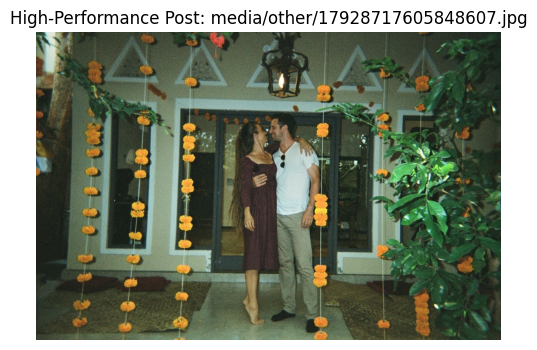

Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/18357843769187639.jpg


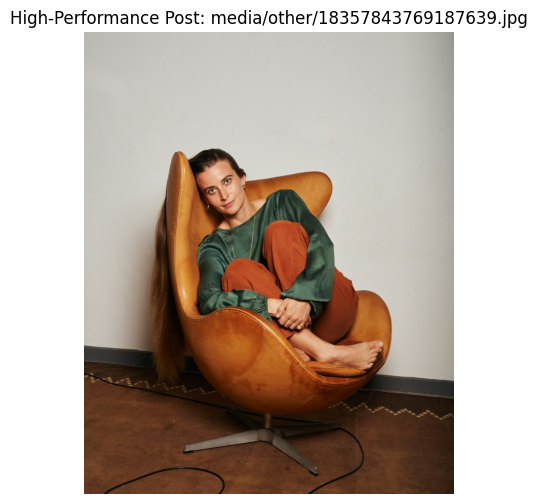

Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/18439507759069649.jpg


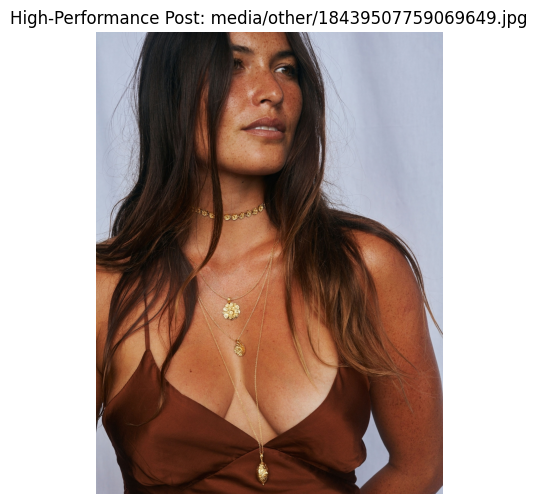

In [135]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

high_performance_posts = posts_model[posts_model["performance_label_log"] == "High"]

high_performance_uris = high_performance_posts["uri"].tolist()

image_folder = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio"

def show_images(uris):
    for uri in uris:
        # Construct the full path of the image
        image_path = os.path.join(image_folder, uri)
        
        # Print the image path to see if it's correct
        print(f"Constructed image path: {image_path}")
        
        if os.path.exists(image_path):  # Check if the image exists
            img = mpimg.imread(image_path)
            plt.figure(figsize=(6, 6))
            plt.imshow(img)
            plt.title(f"High-Performance Post: {uri}")
            plt.axis('off')  # Remove axes
            plt.show()
        else:
            print(f"Image not found for URI: {uri}")

# Show images for high-performing posts
show_images(high_performance_uris[:5])



Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/18067352005700577.jpg


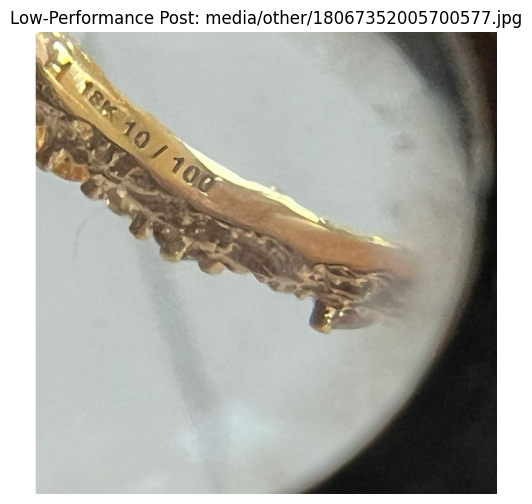

Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/18045234064965601.jpg


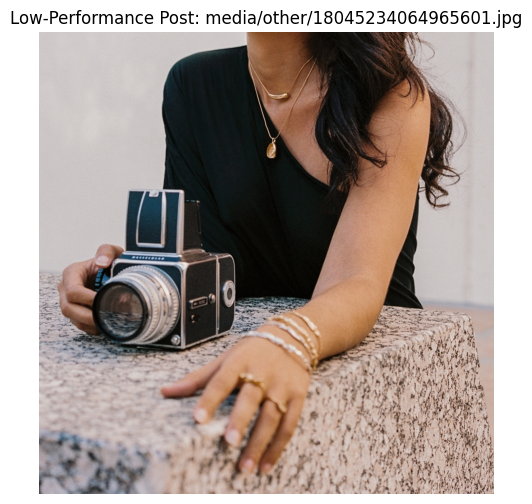

Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/18099787519433485.jpg


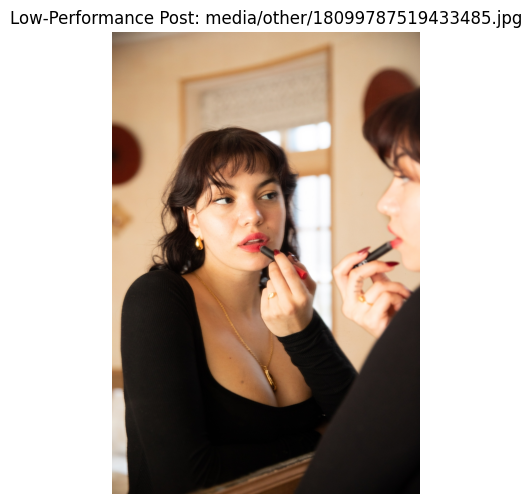

Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/18017275094400400.jpg


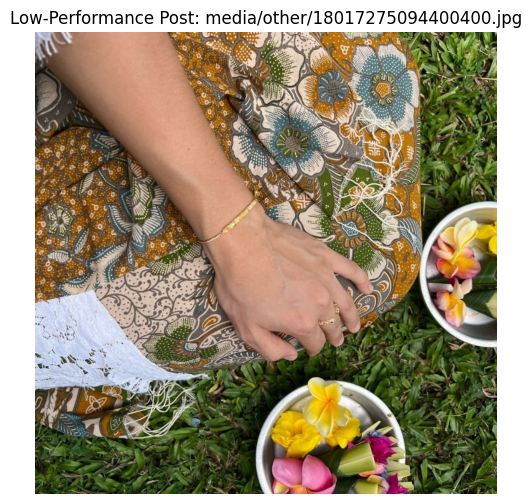

Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/17871385497248217.jpg


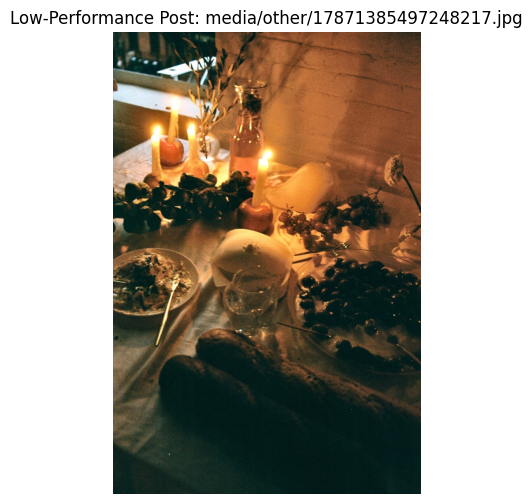

In [138]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

low_performance_posts = posts_model[posts_model["performance_label_log"] == "Low"]

low_performance_uris = low_performance_posts["uri"].tolist()

image_folder = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio"

def show_images(uris):
    for uri in uris:
        # Construct the full path of the image
        image_path = os.path.join(image_folder, uri)
        
        # Print the image path to see if it's correct
        print(f"Constructed image path: {image_path}")
        
        if os.path.exists(image_path):  # Check if the image exists
            img = mpimg.imread(image_path)
            plt.figure(figsize=(6, 6))
            plt.imshow(img)
            plt.title(f"Low-Performance Post: {uri}")
            plt.axis('off')  # Remove axes
            plt.show()
        else:
            print(f"Image not found for URI: {uri}")

show_images(low_performance_uris[:5])



Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/18005202119701873.jpg


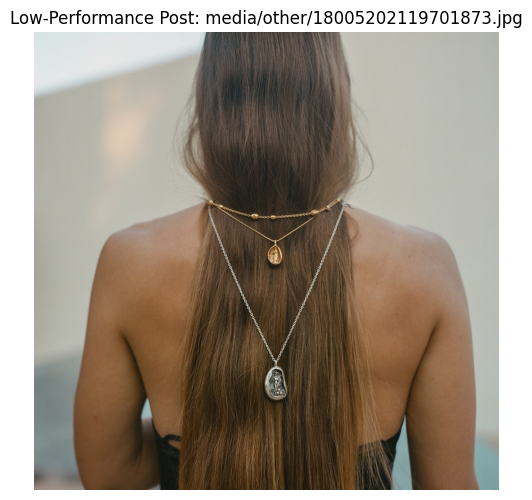

Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/17850460545325482.jpg


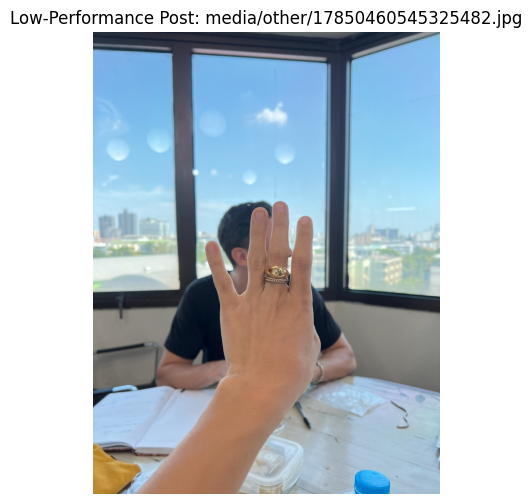

Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/18365546479137722.jpg


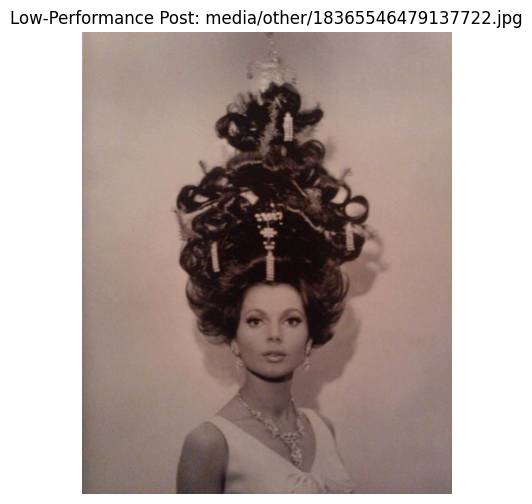

Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/17873021922248056.jpg


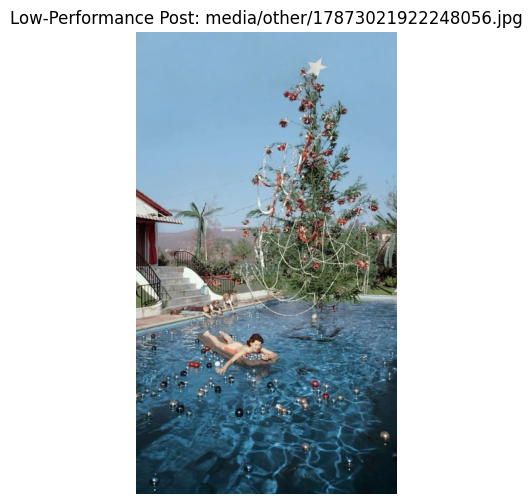

Constructed image path: C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio\media/other/18341377786181689.jpg


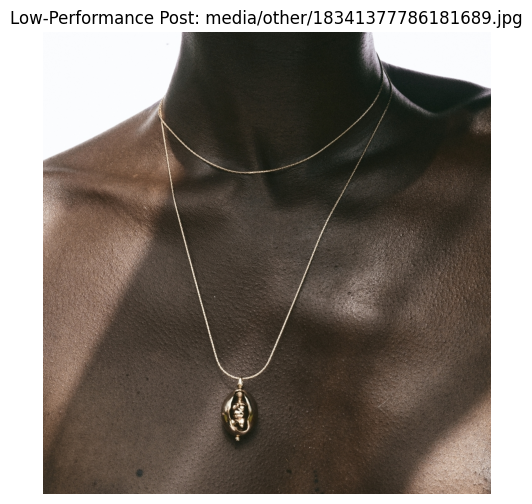

In [139]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

mid_performance_posts = posts_model[posts_model["performance_label_log"] == "Medium"]

mid_performance_uris = mid_performance_posts["uri"].tolist()

image_folder = r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\instagram-carinahardy.studio"

def show_images(uris):
    for uri in uris:
        # Construct the full path of the image
        image_path = os.path.join(image_folder, uri)
        
        # Print the image path to see if it's correct
        print(f"Constructed image path: {image_path}")
        
        if os.path.exists(image_path):  # Check if the image exists
            img = mpimg.imread(image_path)
            plt.figure(figsize=(6, 6))
            plt.imshow(img)
            plt.title(f"Low-Performance Post: {uri}")
            plt.axis('off')  # Remove axes
            plt.show()
        else:
            print(f"Image not found for URI: {uri}")

show_images(mid_performance_uris[:5])

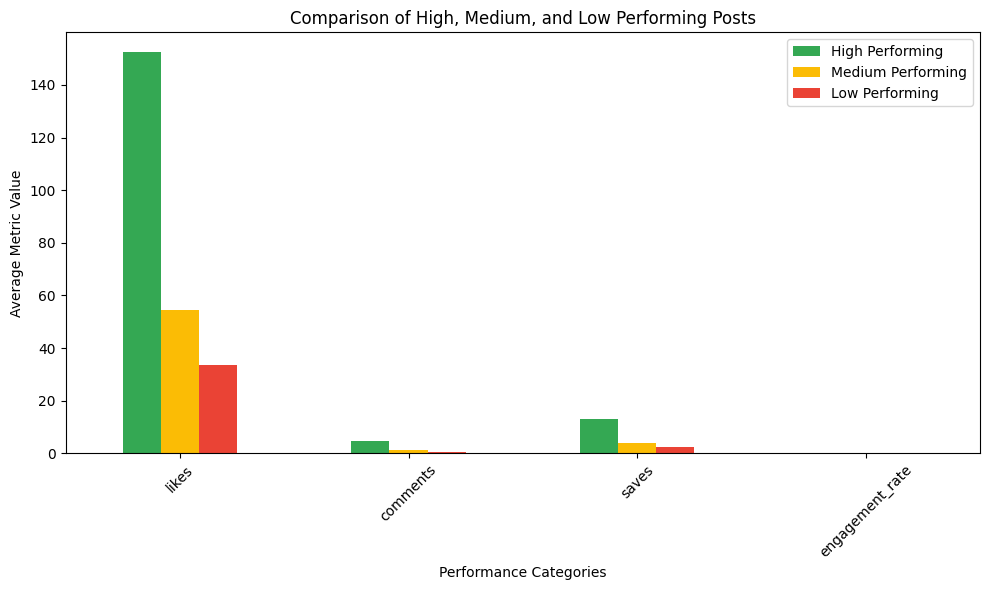

In [143]:
# Step 1: Define high, medium, and low-performing posts based on log_engagement_rate
high_threshold = posts_model["log_engagement_rate"].quantile(0.75)  # 75th quantile for high performance
low_threshold = posts_model["log_engagement_rate"].quantile(0.25)   # 25th quantile for low performance

# High performance: log_engagement_rate >= 75th percentile
high_performance = posts_model[posts_model["log_engagement_rate"] >= high_threshold]

# Medium performance: log_engagement_rate between 25th and 75th percentile
medium_performance = posts_model[(posts_model["log_engagement_rate"] < high_threshold) & 
                                  (posts_model["log_engagement_rate"] >= low_threshold)]

# Low performance: log_engagement_rate <= 25th percentile
low_performance = posts_model[posts_model["log_engagement_rate"] <= low_threshold]

# Step 2: Calculate average engagement metrics for high, medium, and low-performing posts
high_avg = high_performance[["likes", "comments", "saves", "engagement_rate"]].mean()
medium_avg = medium_performance[["likes", "comments", "saves", "engagement_rate"]].mean()
low_avg = low_performance[["likes", "comments", "saves", "engagement_rate"]].mean()

# Step 3: Plot the comparison of high, medium, and low-performing posts
engagement_metrics = ["likes", "comments", "saves", "engagement_rate"]

# Create a DataFrame to hold the average values for high, medium, and low-performing posts
performance_comparison = pd.DataFrame({
    "High Performing": high_avg,
    "Medium Performing": medium_avg,
    "Low Performing": low_avg
})

# Plot the comparison
performance_comparison.plot(kind="bar", figsize=(10, 6), color=["#34a853", "#fbbc05", "#ea4335"])
plt.title("Comparison of High, Medium, and Low Performing Posts")
plt.ylabel("Average Metric Value")
plt.xlabel("Performance Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

